# Cardiovascular Diseases (CVDs)

Cardiovascular diseases are a leading cause of death globally, resulting in a significant burden on individuals, families, healthcare systems, and societies. Analyzing cardiovascular diseases helps in understanding the causes, risk factors, and patterns of these diseases to develop effective prevention and management strategies.

 Analyzing cardiovascular diseases allows for the identification and assessment of risk factors associated with their development. By studying data, researchers and healthcare professionals can identify modifiable risk factors such as high blood pressure, high cholesterol, smoking, physical inactivity, and obesity. This knowledge enables the implementation of preventive measures and lifestyle interventions to reduce the risk of cardiovascular diseases.

### Key Facts

* Cardiovascular diseases (CVDs) are the leading cause of death globally.
* An estimated 17.9 million people died from CVDs in 2019, representing 32% of all global deaths. Of these deaths, 85% * were due to heart attack and stroke.
* Over three quarters of CVD deaths take place in low- and middle-income countries.

## Problem Statement

The objective of this study is to analyse the relationship between cardiovascular diseases and various factors such as blood pressure (diastolic and systolic), gender, weight, height, smoking habits, physical activity, and BMI. The aim is to investigate how these factors individually and in combination contribute to the prevalence and severity of cardiovascular diseases. By conducting a comprehensive analysis, this study seeks to identify potential risk factors and develop predictive models that can assist in the early detection and prevention of cardiovascular disease.

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns






In [95]:
%matplotlib inline      

In [96]:
df = pd.read_csv("cardio_train.csv",sep = ';')

In [97]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### Input Features

* id              ||id_number               
* age             ||in days
* gender          ||1 - women, 2 - men
* height          ||cm
* weight          ||Kg
* ap_hi           ||Systolic blood pressure
* ap_lo           ||Diastolic blood pressure
* cholesterol     ||1: normal, 2: above normal, 3: well above normal
* gluc            ||1: normal, 2: above normal, 3: well above normal
* smoke           ||whether patient smokes or not
* alco            ||whether patient consume alcohol or not
* active          ||whether patient involved in physical activity or not
* cardio          ||Person is positive or negative regarding cardiovascular diseases


### Analyzing target variable

In [98]:
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

<Axes: xlabel='cardio', ylabel='count'>

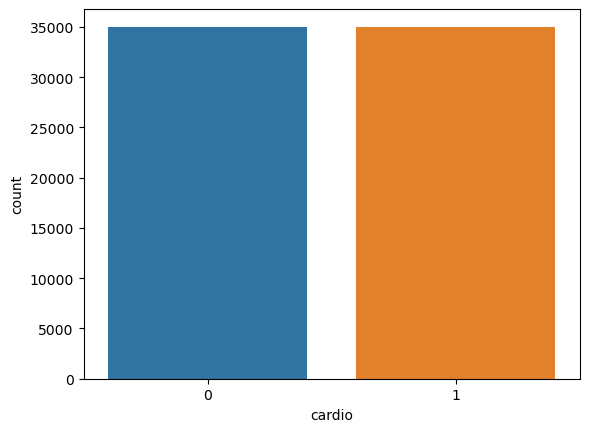

In [99]:
#Finding data is balanced or not.
sns.countplot(x='cardio',data=df)

### Dependent Variable Information

In [100]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### Preprocessing The Data 

In [101]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [102]:
df.shape

(70000, 13)

In [103]:
#finding any duplicate rows
duplicate_sum = df.duplicated().sum()
if duplicate_sum:
    print(f'Number of duplicate rows in a dataset: {df(duplicate_sum)}')
else:
    print("Dataset contains no duplicate dataset")

Dataset contains no duplicate dataset


In [104]:
#Generally age is measured in years.
df['age_in_years'] = df['age']//365


In [105]:
df['bmi'] = (df['weight']*10000)/ (df['height']**2)

In [106]:
df 

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years,bmi
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52,26.927438
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61,50.472681
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52,31.353579
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61,27.099251


In [107]:
variances=df.var()

In [108]:
print("Height",variances['height'])
print("Age",variances['age_in_years'])
print("Weight",variances['weight'])
print("Systolic blood pressure",variances['ap_hi'])
print("Diastolic blood pressure",variances['ap_lo'])
print("BMI",variances["bmi"])

df_range = np.max(df) - np.min(df)
print("Range of the features: ")
print(df_range)




Height 67.40617492168424
Age 45.789225680977175
Weight 207.2378103468814
Systolic blood pressure 23719.51732286912
Diastolic blood pressure 35521.894676341006
BMI 37.1065077663369
Range of the features: 
id              99999.000000
age             12915.000000
gender              1.000000
height            195.000000
weight            190.000000
ap_hi           16170.000000
ap_lo           11070.000000
cholesterol         2.000000
gluc                2.000000
smoke               1.000000
alco                1.000000
active              1.000000
cardio              1.000000
age_in_years       35.000000
bmi               295.194883
dtype: float64


/Users/dkgupta/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/dkgupta/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


### Unique_values

In [109]:
# finding out the unique values in the columns 
def unique_values(column_name):
    unique_v = df[column_name].unique()
    unique_v.sort()
    return unique_v

In [110]:
unique_values('age_in_years')                                         


array([29, 30, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64])

In [111]:
unique_values('ap_hi')                                                                

array([ -150,  -140,  -120,  -115,  -100,     1,     7,    10,    11,
          12,    13,    14,    15,    16,    17,    20,    24,    60,
          70,    80,    85,    90,    93,    95,    96,    97,    99,
         100,   101,   102,   103,   104,   105,   106,   107,   108,
         109,   110,   111,   112,   113,   114,   115,   116,   117,
         118,   119,   120,   121,   122,   123,   124,   125,   126,
         127,   128,   129,   130,   131,   132,   133,   134,   135,
         136,   137,   138,   139,   140,   141,   142,   143,   144,
         145,   146,   147,   148,   149,   150,   151,   152,   153,
         154,   155,   156,   157,   158,   159,   160,   161,   162,
         163,   164,   165,   166,   167,   168,   169,   170,   171,
         172,   173,   174,   175,   176,   177,   178,   179,   180,
         181,   184,   185,   187,   188,   190,   191,   193,   195,
         196,   197,   199,   200,   202,   207,   210,   215,   220,
         230,   240,

In [112]:
unique_values('ap_lo')

array([  -70,     0,     1,     6,     7,     8,     9,    10,    15,
          20,    30,    40,    45,    49,    50,    52,    53,    54,
          55,    56,    57,    58,    59,    60,    61,    62,    63,
          64,    65,    66,    67,    68,    69,    70,    71,    72,
          73,    74,    75,    76,    77,    78,    79,    80,    81,
          82,    83,    84,    85,    86,    87,    88,    89,    90,
          91,    92,    93,    94,    95,    96,    97,    98,    99,
         100,   101,   102,   103,   104,   105,   106,   107,   108,
         109,   110,   111,   112,   113,   114,   115,   118,   119,
         120,   121,   122,   125,   126,   130,   135,   140,   150,
         160,   170,   180,   182,   190,   585,   602,   700,   708,
         709,   710,   800,   801,   802,   809,   810,   820,   850,
         870,   880,   900,   901,   902,   910,  1000,  1001,  1002,
        1003,  1007,  1008,  1011,  1022,  1033,  1044,  1077,  1088,
        1100,  1101,

In [113]:
unique_values('weight')

array([ 10.  ,  11.  ,  21.  ,  22.  ,  23.  ,  28.  ,  29.  ,  30.  ,
        31.  ,  32.  ,  33.  ,  34.  ,  35.  ,  35.45,  36.  ,  37.  ,
        38.  ,  39.  ,  40.  ,  41.  ,  42.  ,  42.2 ,  43.  ,  44.  ,
        45.  ,  45.8 ,  46.  ,  47.  ,  48.  ,  49.  ,  50.  ,  50.5 ,
        50.7 ,  51.  ,  51.5 ,  52.  ,  52.3 ,  53.  ,  53.2 ,  53.3 ,
        53.5 ,  53.6 ,  53.67,  53.9 ,  54.  ,  54.35,  54.5 ,  54.9 ,
        55.  ,  55.2 ,  55.4 ,  55.6 ,  56.  ,  56.2 ,  57.  ,  57.4 ,
        57.6 ,  57.8 ,  58.  ,  58.5 ,  58.7 ,  58.8 ,  59.  ,  59.2 ,
        59.5 ,  59.8 ,  60.  ,  60.1 ,  60.2 ,  60.5 ,  60.6 ,  61.  ,
        61.2 ,  61.3 ,  61.5 ,  62.  ,  62.2 ,  62.3 ,  62.4 ,  62.5 ,
        62.7 ,  63.  ,  63.4 ,  63.8 ,  63.82,  64.  ,  64.1 ,  64.3 ,
        64.5 ,  64.7 ,  64.8 ,  65.  ,  65.3 ,  65.5 ,  66.  ,  66.3 ,
        66.4 ,  66.5 ,  67.  ,  67.3 ,  67.5 ,  67.8 ,  67.9 ,  68.  ,
        68.2 ,  68.3 ,  68.4 ,  68.5 ,  68.9 ,  69.  ,  69.5 ,  69.8 ,
      

In [114]:


unique_values('bmi')

array([  3.47178387,   3.67309458,   7.02224776, ..., 267.76859504,
       278.125     , 298.66666667])

In [115]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years,bmi
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52,26.927438
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61,50.472681
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52,31.353579
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61,27.099251



## Cleaning and processing the data

In [116]:
df_invalid=df[(df.ap_hi<60) | (df.ap_hi>309)
              | (df.ap_lo<30) | (df.ap_lo>190) | (df['ap_lo']>df['ap_hi'])|(df['bmi']>=60)]

In [117]:
df_invalid

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years,bmi
224,309,21800,2,76,55.0,120,80,1,1,0,0,1,0,59,95.221607
228,314,17489,2,183,98.0,160,1100,1,2,1,0,1,1,47,29.263340
241,334,21932,2,157,60.0,160,1000,2,1,0,0,0,1,60,24.341758
260,357,18217,1,150,83.0,140,800,1,1,0,0,1,1,49,36.888889
329,458,23407,1,176,63.0,160,1000,2,2,0,0,0,1,64,20.338326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69771,99659,23330,1,167,81.0,160,1000,1,1,0,0,1,1,63,29.043709
69872,99798,21808,1,152,56.0,160,1000,1,1,0,0,1,1,59,24.238227
69878,99807,21239,2,168,95.0,160,1000,1,1,0,0,1,1,58,33.659297
69885,99816,22417,2,166,78.0,170,1000,1,1,0,0,0,0,61,28.305995


In [118]:
print(f'Percentage of number of invalid rows : {round((1382*100)/70000,2)}%.')

Percentage of number of invalid rows : 1.97%.


In [119]:
df=df[(df.ap_hi>=60) & (df.ap_lo>=30)]
df=df[(df.ap_hi<=309) & (df.ap_lo <= 190)]
df=df[(df.ap_hi>df.ap_lo)]
df=df[(df['bmi']<60)]

In [120]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years,bmi
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52,26.927438
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61,50.472681
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52,31.353579
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61,27.099251


In [121]:
df.drop(['id','age'],axis=1,inplace = True)

In [122]:
df

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years,bmi
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2,168,76.0,120,80,1,1,1,0,1,0,52,26.927438
69996,1,158,126.0,140,90,2,2,0,0,1,1,61,50.472681
69997,2,183,105.0,180,90,3,1,0,1,0,1,52,31.353579
69998,1,163,72.0,135,80,1,2,0,0,0,1,61,27.099251


In [123]:
df.columns 

Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'cardio', 'age_in_years', 'bmi'],
      dtype='object')

In [124]:
df

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years,bmi
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2,168,76.0,120,80,1,1,1,0,1,0,52,26.927438
69996,1,158,126.0,140,90,2,2,0,0,1,1,61,50.472681
69997,2,183,105.0,180,90,3,1,0,1,0,1,52,31.353579
69998,1,163,72.0,135,80,1,2,0,0,0,1,61,27.099251


### Factors Contributing In Risk


####  Blood Pressure

<Axes: xlabel='age_group', ylabel='count'>

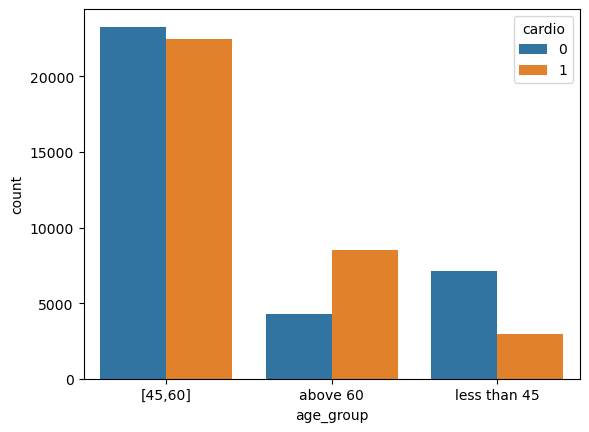

In [125]:

df.loc[(df.age_in_years >=45) & (df.age_in_years <60), 'age_group'] = '[45,60]'
df.loc[(df.age_in_years >= 60) , 'age_group'] = 'above 60'
df.loc[(df.age_in_years < 45) , 'age_group'] = 'less than 45'

sns.countplot(x='age_group',hue="cardio",data=df)

We can clearly see from the plot that more number of patients are there in elderly age_group.Elderly age_group are in higher risk.

,Custom Agg Func,Count,Cardio Percentage
Age-wise Distribution for Women,,,
"[45,60]",14675,30232,48.541281
above 60,5577,8203,67.987322
less than 45,1739,6256,27.797315


,Custom Agg Func,Count,Cardio Percentage
Age-wise Distribution for Men,,,
"[45,60]",7802,15527,50.247955
above 60,2941,4564,64.439089
less than 45,1213,3834,31.637976


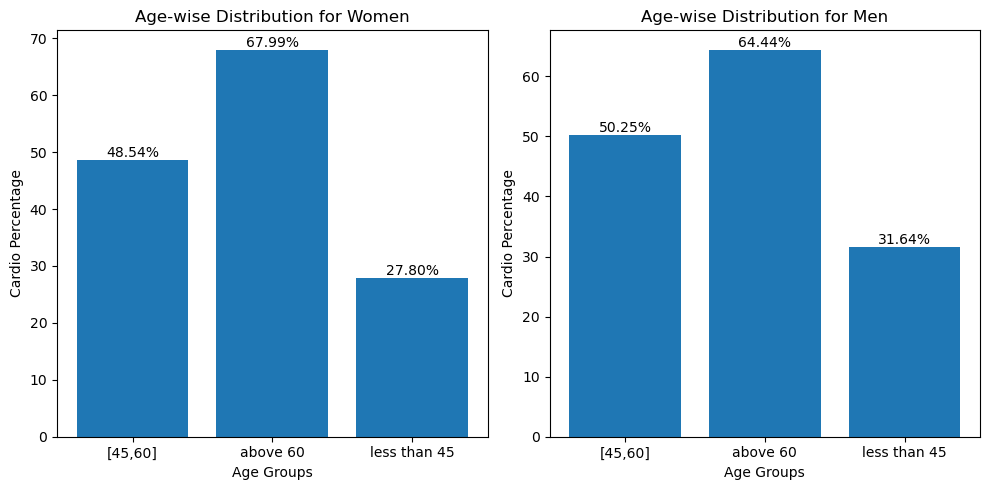

In [126]:
# Define the custom aggregate function with a lambda function
custom_agg_func = lambda x: len(x[x == 1])

# Calculate cardio percentages for women
df_ratings_women_counts = pd.pivot_table(df[df['gender'] == 1],
                                         index=['age_group'],
                                         values=["cardio"],
                                         aggfunc=[custom_agg_func, len])
df_ratings_women_counts.columns = ['Custom Agg Func', 'Count']
df_ratings_women_counts['Cardio Percentage'] = (df_ratings_women_counts['Custom Agg Func'] / df_ratings_women_counts['Count']) * 100

# Calculate cardio percentages for men      
df_ratings_men_counts = pd.pivot_table(df[df['gender'] == 2],
                                       index=['age_group'],
                                       values=["cardio"],
                                       aggfunc=[custom_agg_func, len])
df_ratings_men_counts.columns = ['Custom Agg Func', 'Count']
df_ratings_men_counts['Cardio Percentage'] = (df_ratings_men_counts['Custom Agg Func'] / df_ratings_men_counts['Count']) * 100

# Set up subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot bar graph for women
x_data_women = df_ratings_women_counts.index
y_data_women = df_ratings_women_counts['Cardio Percentage']
ax[0].bar(x_data_women, y_data_women)
ax[0].set_title('Age-wise Distribution for Women')
ax[0].set_xlabel('Age Groups')
ax[0].set_ylabel('Cardio Percentage')

# Add percentage labels above the bars for women
for i in range(len(x_data_women)):
    ax[0].text(x_data_women[i], y_data_women[i], f"{y_data_women[i]:.2f}%", ha='center', va='bottom')

# Plot bar graph for men
x_data_men = df_ratings_men_counts.index
y_data_men = df_ratings_men_counts['Cardio Percentage']
ax[1].bar(x_data_men, y_data_men)
ax[1].set_title('Age-wise Distribution for Men')
ax[1].set_xlabel('Age Groups')
ax[1].set_ylabel('Cardio Percentage')

# Add percentage labels above the bars for men
for i in range(len(x_data_men)):
    ax[1].text(x_data_men[i], y_data_men[i], f"{y_data_men[i]:.2f}%", ha='center', va='bottom')

# Adjust spacing between subplots
plt.tight_layout()

# Display the pivot tables
df_ratings_women_counts = df_ratings_women_counts.rename_axis("Age-wise Distribution for Women")
display(df_ratings_women_counts)

df_ratings_men_counts = df_ratings_men_counts.rename_axis("Age-wise Distribution for Men")
display(df_ratings_men_counts)

# Show the plots
plt.show()

,Custom Agg Func,Count,Cardio Percentage
age_group,,,
"[45,60]",7477,11403,65.570464
above 60,3208,4151,77.282583
less than 45,858,1610,53.291925


,Custom Agg Func,Count,Cardio Percentage
age_group,,,
"[45,60]",15000,34356,43.660496
above 60,5310,8616,61.629526
less than 45,2094,8480,24.693396


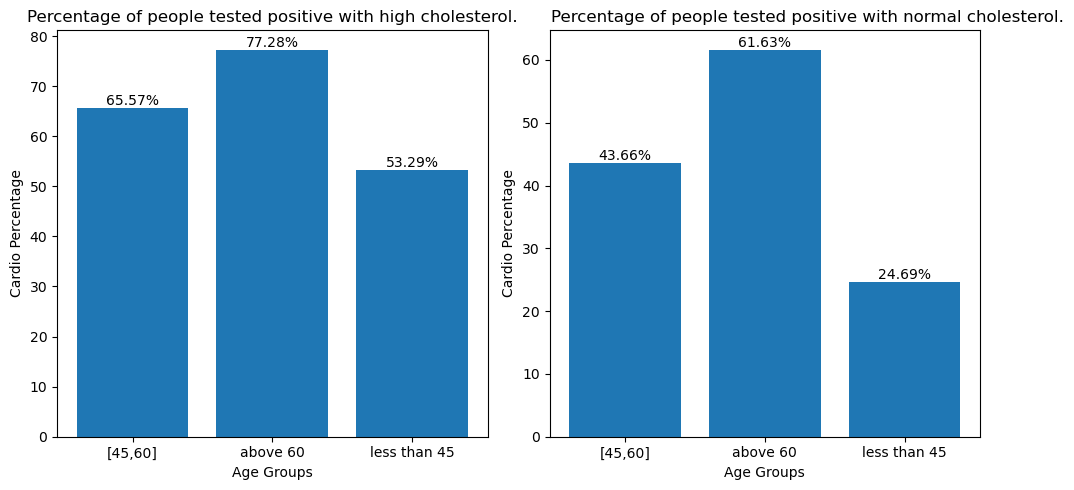

In [127]:

custom_agg_func = lambda x: len(x[x == 1])


df_chol = pd.pivot_table(df[((df['cholesterol']==2) | (df['cholesterol']==3))],
                                         index=['age_group'],
                                         values=["cardio"],
                                         aggfunc=[custom_agg_func, len])
df_chol.columns = ['Custom Agg Func', 'Count']
df_chol['Cardio Percentage'] = (df_chol['Custom Agg Func'] / df_chol['Count']) * 100



df_cardio = pd.pivot_table(df[((df['cholesterol']==1))],
                                         index=['age_group'],
                                         values=["cardio"],
                                         aggfunc=[custom_agg_func, len])
df_cardio.columns = ['Custom Agg Func', 'Count']
df_cardio['Cardio Percentage'] = (df_cardio['Custom Agg Func'] / df_cardio['Count']) * 100



fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))


x_data_chol = df_chol.index
y_data_chol = df_chol['Cardio Percentage']
ax[0].bar(x_data_chol, y_data_chol)
ax[0].set_title('Percentage of people tested positive with high cholesterol.')
ax[0].set_xlabel('Age Groups')
ax[0].set_ylabel('Cardio Percentage')


for i in range(len(x_data_chol)):
    ax[0].text(x_data_chol[i], y_data_chol[i], f"{y_data_chol[i]:.2f}%", ha='center', va='bottom')


x_data = df_cardio.index
y_data = df_cardio['Cardio Percentage']
ax[1].bar(x_data, y_data)
ax[1].set_title('Percentage of people tested positive with normal cholesterol.',x=0.6)
ax[1].set_xlabel('Age Groups')
ax[1].set_ylabel('Cardio Percentage')


for i in range(len(x_data_women)):
    ax[1].text(x_data[i], y_data[i], f"{y_data[i]:.2f}%", ha='center', va='bottom')
    



display(df_chol)
display(df_cardio)

plt.subplots_adjust(wspace=0.5)
# Adjust spacing between subplots
plt.tight_layout()




# Show the plots
plt.show()

,Custom Agg Func,Count,Cardio Percentage
age_group,,,
"[45,60]",91,143,63.636364
above 60,27,34,79.411765
less than 45,11,16,68.750000


,Custom Agg Func,Count,Cardio Percentage
age_group,,,
"[45,60]",11170,26211,42.615696
above 60,3981,6588,60.428051
less than 45,1550,6399,24.222535


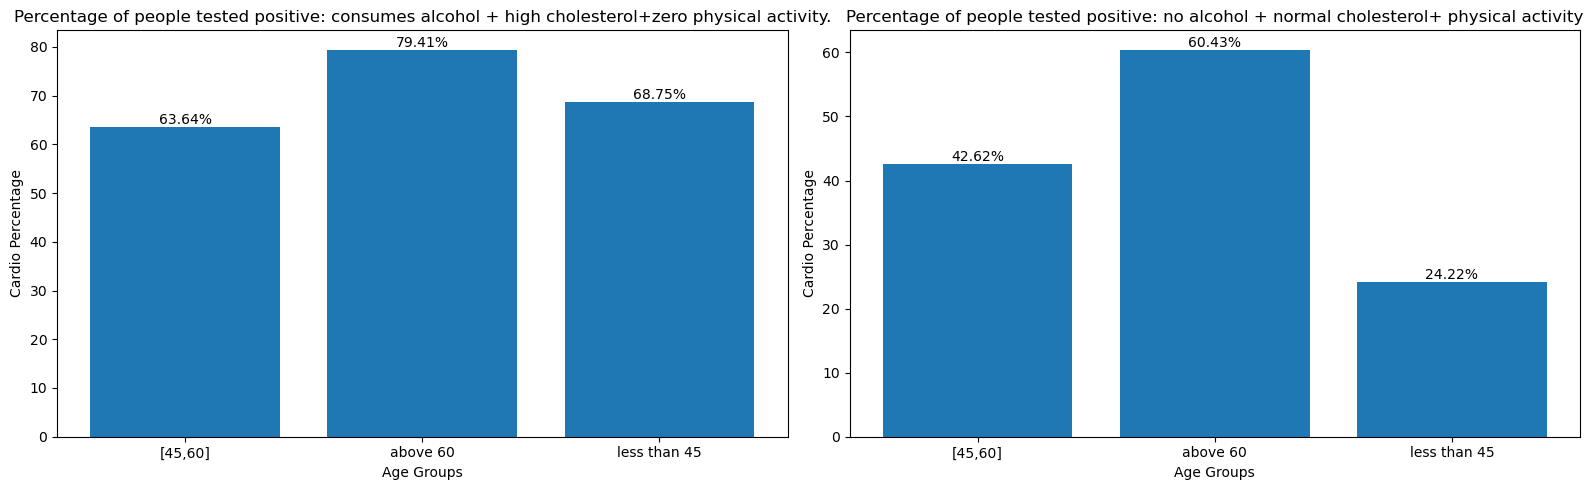

In [128]:
# Define the custom aggregate function with a lambda function
custom_agg_func = lambda x: len(x[x == 1])


df_cardio_smoke = pd.pivot_table(df[( (df['alco']==1) & (df['active']==0) &((df['cholesterol']==2) | (df['cholesterol'] ==3)))],
                                         index=['age_group'],
                                         values=["cardio"],
                                         aggfunc=[custom_agg_func, len])
df_cardio_smoke.columns = ['Custom Agg Func', 'Count']
df_cardio_smoke['Cardio Percentage'] = (df_cardio_smoke['Custom Agg Func'] / df_cardio_smoke['Count']) * 100



df_cardio = pd.pivot_table(df[((df['alco']==0) & (df['active'] == 1) & (df['cholesterol']==1))],
                                         index=['age_group'],
                                         values=["cardio"],
                                         aggfunc=[custom_agg_func, len])
df_cardio.columns = ['Custom Agg Func', 'Count']
df_cardio['Cardio Percentage'] = (df_cardio['Custom Agg Func'] / df_cardio['Count']) * 100



# Set up subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))


x_data_smoke = df_cardio_smoke.index
y_data_smoke = df_cardio_smoke['Cardio Percentage']
ax[0].bar(x_data_smoke, y_data_smoke)
ax[0].set_title('Percentage of people tested positive: consumes alcohol + high cholesterol+zero physical activity.')
ax[0].set_xlabel('Age Groups')
ax[0].set_ylabel('Cardio Percentage')


for i in range(len(x_data_smoke)):
    ax[0].text(x_data_smoke[i], y_data_smoke[i], f"{y_data_smoke[i]:.2f}%", ha='center', va='bottom')


x_data = df_cardio.index
y_data = df_cardio['Cardio Percentage']
ax[1].bar(x_data, y_data)
ax[1].set_title('Percentage of people tested positive: no alcohol + normal cholesterol+ physical activity')
ax[1].set_xlabel('Age Groups')
ax[1].set_ylabel('Cardio Percentage')


for i in range(len(x_data_women)):
    ax[1].text(x_data[i], y_data[i], f"{y_data[i]:.2f}%", ha='center', va='bottom')
    



display(df_cardio_smoke)
display(df_cardio)

# Adjust spacing between subplots
plt.tight_layout()




# Show the plots
plt.show()

,Custom Agg Func,Count,Cardio Percentage
age_group,,,
"[45,60]",8678,13828,62.756725
above 60,3670,4906,74.806360
less than 45,1039,2084,49.856046


,Custom Agg Func,Count,Cardio Percentage
age_group,,,
"[45,60]",14241,32905,43.279137
above 60,5032,8192,61.425781
less than 45,1956,8158,23.976465


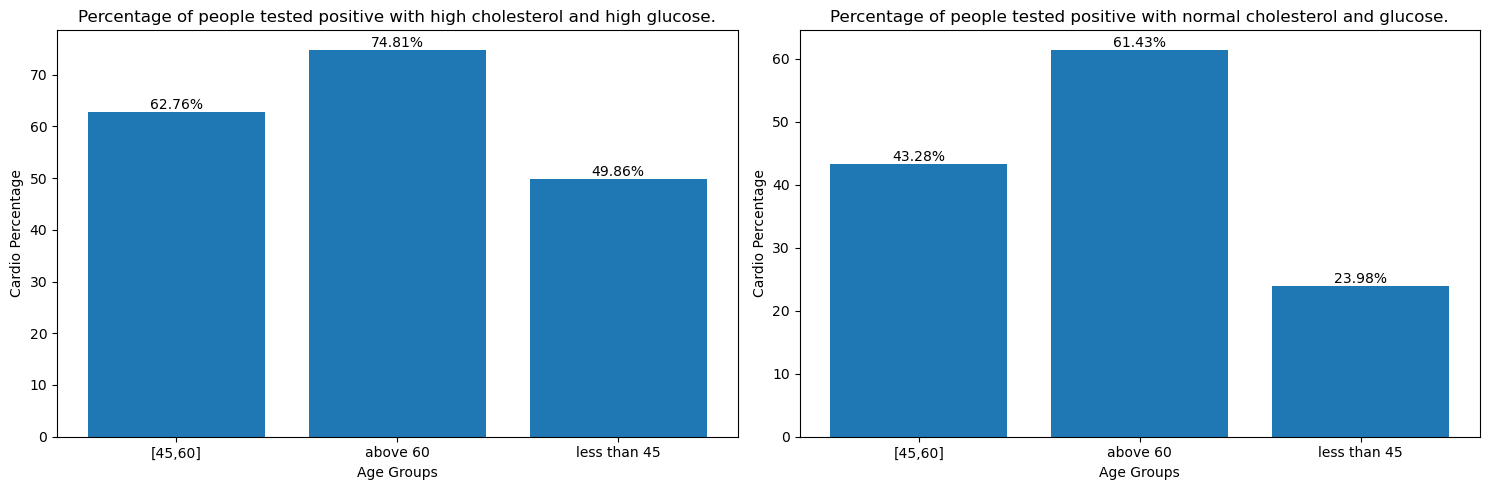

In [129]:
# Define the custom aggregate function with a lambda function
custom_agg_func = lambda x: len(x[x == 1])


df_chol = pd.pivot_table(df[((df['cholesterol']==2) | (df['cholesterol']==3) |(df['gluc']==2) |(df['gluc'] == 3))],
                                         index=['age_group'],
                                         values=["cardio"],
                                         aggfunc=[custom_agg_func, len])
df_chol.columns = ['Custom Agg Func', 'Count']
df_chol['Cardio Percentage'] = (df_chol['Custom Agg Func'] / df_chol['Count']) * 100



df_cardio = pd.pivot_table(df[((df['cholesterol']==1) & df['gluc']==1)],
                                         index=['age_group'],
                                         values=["cardio"],
                                         aggfunc=[custom_agg_func, len])
df_cardio.columns = ['Custom Agg Func', 'Count']
df_cardio['Cardio Percentage'] = (df_cardio['Custom Agg Func'] / df_cardio['Count']) * 100




fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))


x_data_chol = df_chol.index
y_data_chol = df_chol['Cardio Percentage']
ax[0].bar(x_data_chol, y_data_chol)
ax[0].set_title('Percentage of people tested positive with high cholesterol and high glucose.')
ax[0].set_xlabel('Age Groups')
ax[0].set_ylabel('Cardio Percentage')


for i in range(len(x_data_chol)):
    ax[0].text(x_data_chol[i], y_data_chol[i], f"{y_data_chol[i]:.2f}%", ha='center', va='bottom')


x_data = df_cardio.index
y_data = df_cardio['Cardio Percentage']
ax[1].bar(x_data, y_data)
ax[1].set_title('Percentage of people tested positive with normal cholesterol and glucose.')
ax[1].set_xlabel('Age Groups')
ax[1].set_ylabel('Cardio Percentage')


for i in range(len(x_data_women)):
    ax[1].text(x_data[i], y_data[i], f"{y_data[i]:.2f}%", ha='center', va='bottom')
    
 


display(df_chol)
display(df_cardio)

plt.subplots_adjust(wspace=0.5)
# Adjust spacing between subplots
plt.tight_layout()




# Show the plots
plt.show()

In [130]:

df.loc[((df.ap_hi <= 120) & (df.ap_lo <= 80) & df.ap_hi>=100 & (df.ap_lo>=60)), 'blood_pressure_level'] = 'Normal'
df.loc[(df.ap_hi > 130) & (df.ap_lo >90 ), 'blood_pressure_level'] = 'High'
df.loc[((df.ap_hi <=110) & (df.ap_lo <=70)),'blood_pressure_level']='Low'


,Custom Agg Func,Count,Cardio Percentage
Blood pressure distribution for Women,,,
High,2385,2838,84.038055
Low,1460,6886,21.202440
Normal,18146,34967,51.894644


,Custom Agg Func,Count,Cardio Percentage
Blood pressure wise distribution for Men,,,
High,1637,1923,85.127405
Low,579,2347,24.669791
Normal,9740,19655,49.554821


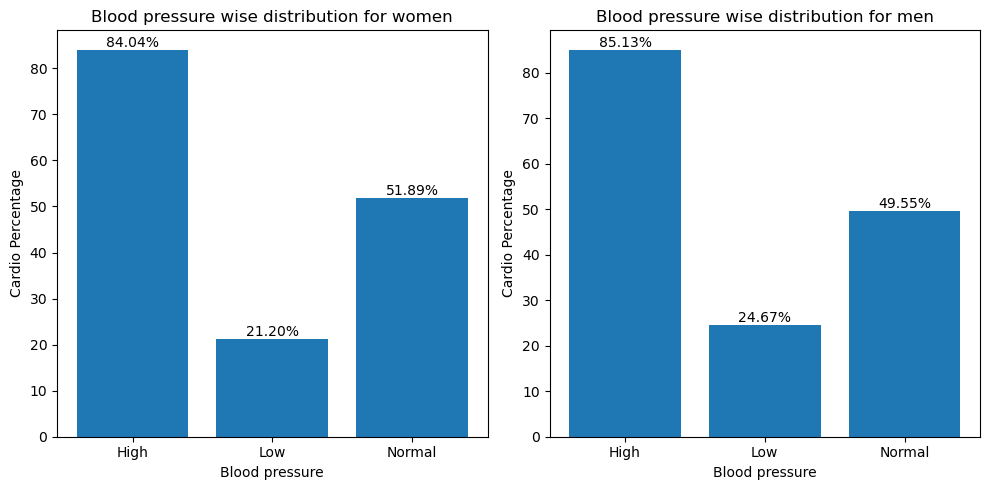

In [131]:
# Define the custom aggregate function with a lambda function
custom_agg_func = lambda x: len(x[x == 1])

# Calculate cardio percentages for women
df_ratings_women_counts = pd.pivot_table(df[df['gender'] == 1],
                                         index=['blood_pressure_level'],
                                         values=["cardio"],
                                         aggfunc=[custom_agg_func, len])
df_ratings_women_counts.columns = ['Custom Agg Func', 'Count']
df_ratings_women_counts['Cardio Percentage'] = (df_ratings_women_counts['Custom Agg Func'] / df_ratings_women_counts['Count']) * 100

# Calculate cardio percentages for men      
df_ratings_men_counts = pd.pivot_table(df[df['gender'] == 2],
                                       index=['blood_pressure_level'],
                                       values=["cardio"],
                                       aggfunc=[custom_agg_func, len])
df_ratings_men_counts.columns = ['Custom Agg Func', 'Count']
df_ratings_men_counts['Cardio Percentage'] = (df_ratings_men_counts['Custom Agg Func'] / df_ratings_men_counts['Count']) * 100

# Set up subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot bar graph for women
x_data_women = df_ratings_women_counts.index
y_data_women = df_ratings_women_counts['Cardio Percentage']
ax[0].bar(x_data_women, y_data_women)
ax[0].set_title('Blood pressure wise distribution for women')
ax[0].set_xlabel('Blood pressure')
ax[0].set_ylabel('Cardio Percentage')

# Add percentage labels above the bars for women
for i in range(len(x_data_women)):
    ax[0].text(x_data_women[i], y_data_women[i], f"{y_data_women[i]:.2f}%", ha='center', va='bottom')

# Plot bar graph for men
x_data_men = df_ratings_men_counts.index
y_data_men = df_ratings_men_counts['Cardio Percentage']
ax[1].bar(x_data_men, y_data_men)
ax[1].set_title('Blood pressure wise distribution for men')
ax[1].set_xlabel('Blood pressure')
ax[1].set_ylabel('Cardio Percentage')

# Add percentage labels above the bars for men
for i in range(len(x_data_men)):
    ax[1].text(x_data_men[i], y_data_men[i], f"{y_data_men[i]:.2f}%", ha='center', va='bottom')

# Adjust spacing between subplots
plt.tight_layout()

# Display the pivot tables
df_ratings_women_counts = df_ratings_women_counts.rename_axis("Blood pressure distribution for Women")
display(df_ratings_women_counts)

df_ratings_men_counts = df_ratings_men_counts.rename_axis("Blood pressure wise distribution for Men")
display(df_ratings_men_counts)

# Show the plots
plt.show()

,Custom Agg Func,Count,Cardio Percentage
blood_pressure_level,,,
High,1657,1968,84.197154
Low,611,1642,37.210719
Normal,9275,13554,68.429984


,Custom Agg Func,Count,Cardio Percentage
blood_pressure_level,,,
High,2365,2793,84.675976
Low,1428,7591,18.811751
Normal,18611,41068,45.317522


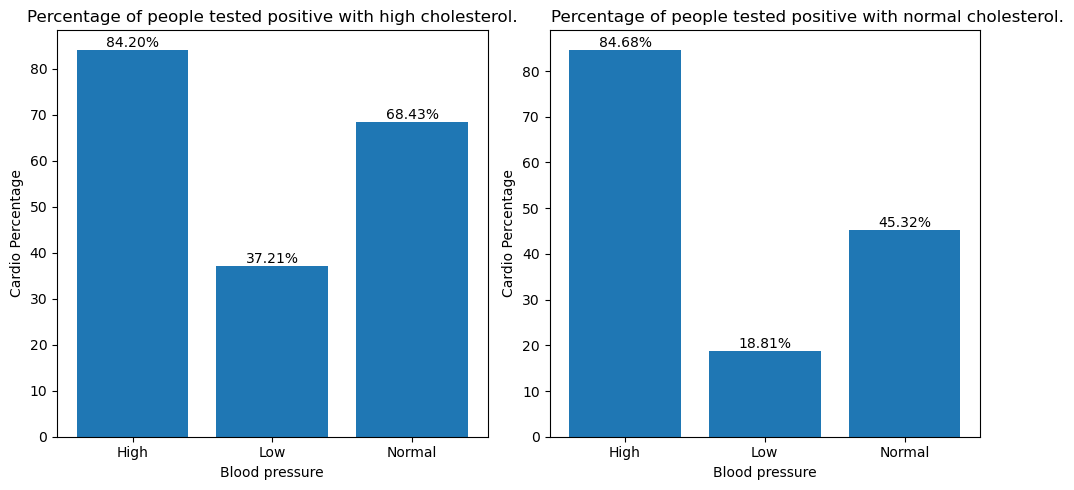

In [132]:
custom_agg_func = lambda x: len(x[x == 1])


df_chol = pd.pivot_table(df[((df['cholesterol']==2) | (df['cholesterol']==3))],
                                         index=['blood_pressure_level'],
                                         values=["cardio"],
                                         aggfunc=[custom_agg_func, len])
df_chol.columns = ['Custom Agg Func', 'Count']
df_chol['Cardio Percentage'] = (df_chol['Custom Agg Func'] / df_chol['Count']) * 100



df_cardio = pd.pivot_table(df[((df['cholesterol']==1))],
                                         index=['blood_pressure_level'],
                                         values=["cardio"],
                                         aggfunc=[custom_agg_func, len])
df_cardio.columns = ['Custom Agg Func', 'Count']
df_cardio['Cardio Percentage'] = (df_cardio['Custom Agg Func'] / df_cardio['Count']) * 100



fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))


x_data_chol = df_chol.index
y_data_chol = df_chol['Cardio Percentage']
ax[0].bar(x_data_chol, y_data_chol)
ax[0].set_title('Percentage of people tested positive with high cholesterol.')
ax[0].set_xlabel('Blood pressure')
ax[0].set_ylabel('Cardio Percentage')


for i in range(len(x_data_chol)):
    ax[0].text(x_data_chol[i], y_data_chol[i], f"{y_data_chol[i]:.2f}%", ha='center', va='bottom')


x_data = df_cardio.index
y_data = df_cardio['Cardio Percentage']
ax[1].bar(x_data, y_data)
ax[1].set_title('Percentage of people tested positive with normal cholesterol.',x=0.6)
ax[1].set_xlabel('Blood pressure')
ax[1].set_ylabel('Cardio Percentage')


for i in range(len(x_data_women)):
    ax[1].text(x_data[i], y_data[i], f"{y_data[i]:.2f}%", ha='center', va='bottom')
    



display(df_chol)
display(df_cardio)

plt.subplots_adjust(wspace=0.5)
# Adjust spacing between subplots
plt.tight_layout()




# Show the plots
plt.show()

,Custom Agg Func,Count,Cardio Percentage
blood_pressure_level,,,
High,31,35,88.571429
Low,2,19,10.526316
Normal,96,139,69.064748


,Custom Agg Func,Count,Cardio Percentage
blood_pressure_level,,,
High,1739,2061,84.376516
Low,1096,5956,18.401612
Normal,13866,31181,44.469388


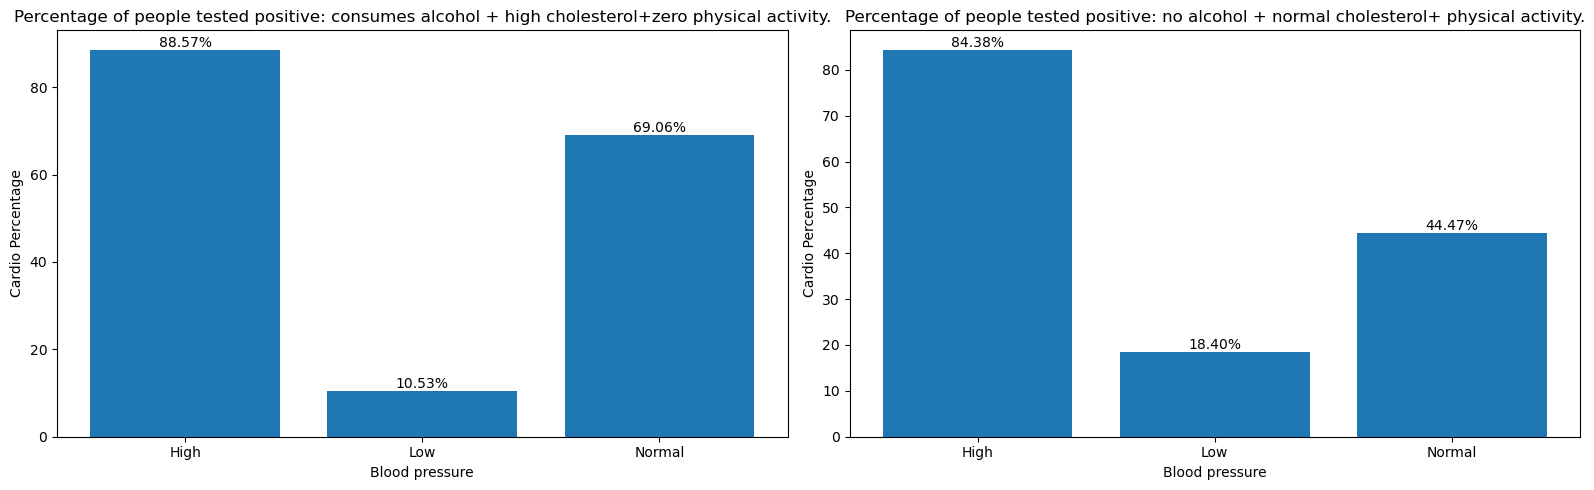

In [133]:
# Define the custom aggregate function with a lambda function
custom_agg_func = lambda x: len(x[x == 1])


df_cardio_smoke = pd.pivot_table(df[( (df['alco']==1) & (df['active']==0) &((df['cholesterol']==2) | (df['cholesterol'] ==3)))],
                                         index=['blood_pressure_level'],
                                         values=["cardio"],
                                         aggfunc=[custom_agg_func, len])
df_cardio_smoke.columns = ['Custom Agg Func', 'Count']
df_cardio_smoke['Cardio Percentage'] = (df_cardio_smoke['Custom Agg Func'] / df_cardio_smoke['Count']) * 100



df_cardio = pd.pivot_table(df[((df['alco']==0) & (df['active'] == 1) & (df['cholesterol']==1))],
                                         index=['blood_pressure_level'],
                                         values=["cardio"],
                                         aggfunc=[custom_agg_func, len])
df_cardio.columns = ['Custom Agg Func', 'Count']
df_cardio['Cardio Percentage'] = (df_cardio['Custom Agg Func'] / df_cardio['Count']) * 100



# Set up subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))


x_data_smoke = df_cardio_smoke.index
y_data_smoke = df_cardio_smoke['Cardio Percentage']
ax[0].bar(x_data_smoke, y_data_smoke)
ax[0].set_title('Percentage of people tested positive: consumes alcohol + high cholesterol+zero physical activity.')
ax[0].set_xlabel('Blood pressure')
ax[0].set_ylabel('Cardio Percentage')


for i in range(len(x_data_smoke)):
    ax[0].text(x_data_smoke[i], y_data_smoke[i], f"{y_data_smoke[i]:.2f}%", ha='center', va='bottom')


x_data = df_cardio.index
y_data = df_cardio['Cardio Percentage']
ax[1].bar(x_data, y_data)
ax[1].set_title('Percentage of people tested positive: no alcohol + normal cholesterol+ physical activity.')
ax[1].set_xlabel('Blood pressure')
ax[1].set_ylabel('Cardio Percentage')


for i in range(len(x_data_women)):
    ax[1].text(x_data[i], y_data[i], f"{y_data[i]:.2f}%", ha='center', va='bottom')
    



display(df_cardio_smoke)
display(df_cardio)

# Adjust spacing between subplots
plt.tight_layout()




# Show the plots
plt.show()

,Custom Agg Func,Count,Cardio Percentage
blood_pressure_level,,,
High,1909,2266,84.245366
Low,737,2124,34.698682
Normal,10741,16428,65.382274


,Custom Agg Func,Count,Cardio Percentage
blood_pressure_level,,,
High,2169,2569,84.429739
Low,1345,7291,18.447401
Normal,17715,39395,44.967635


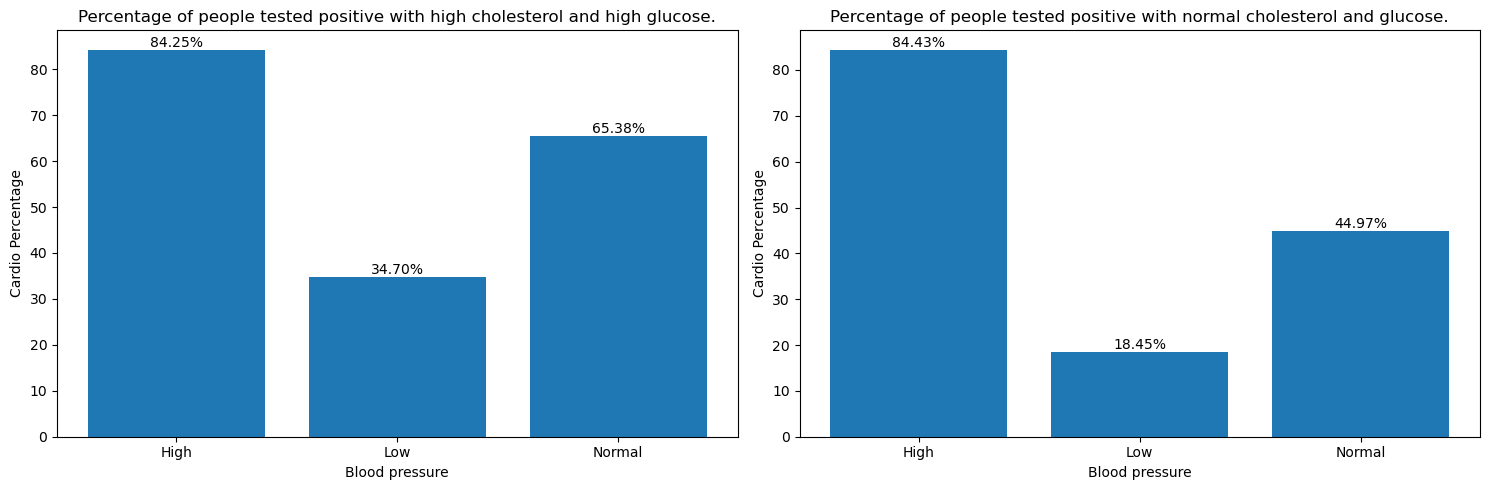

In [134]:
# Define the custom aggregate function with a lambda function
custom_agg_func = lambda x: len(x[x == 1])


df_chol = pd.pivot_table(df[((df['cholesterol']==2) | (df['cholesterol']==3) |(df['gluc']==2) |(df['gluc'] == 3))],
                                         index=['blood_pressure_level'],
                                         values=["cardio"],
                                         aggfunc=[custom_agg_func, len])
df_chol.columns = ['Custom Agg Func', 'Count']
df_chol['Cardio Percentage'] = (df_chol['Custom Agg Func'] / df_chol['Count']) * 100



df_cardio = pd.pivot_table(df[((df['cholesterol']==1) & df['gluc']==1)],
                                         index=['blood_pressure_level'],
                                         values=["cardio"],
                                         aggfunc=[custom_agg_func, len])
df_cardio.columns = ['Custom Agg Func', 'Count']
df_cardio['Cardio Percentage'] = (df_cardio['Custom Agg Func'] / df_cardio['Count']) * 100




fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))


x_data_chol = df_chol.index
y_data_chol = df_chol['Cardio Percentage']
ax[0].bar(x_data_chol, y_data_chol)
ax[0].set_title('Percentage of people tested positive with high cholesterol and high glucose.')
ax[0].set_xlabel('Blood pressure')
ax[0].set_ylabel('Cardio Percentage')


for i in range(len(x_data_chol)):
    ax[0].text(x_data_chol[i], y_data_chol[i], f"{y_data_chol[i]:.2f}%", ha='center', va='bottom')


x_data = df_cardio.index
y_data = df_cardio['Cardio Percentage']
ax[1].bar(x_data, y_data)
ax[1].set_title('Percentage of people tested positive with normal cholesterol and glucose.')
ax[1].set_xlabel('Blood pressure')
ax[1].set_ylabel('Cardio Percentage')


for i in range(len(x_data_women)):
    ax[1].text(x_data[i], y_data[i], f"{y_data[i]:.2f}%", ha='center', va='bottom')
    
 


display(df_chol)
display(df_cardio)

plt.subplots_adjust(wspace=0.5)
# Adjust spacing between subplots
plt.tight_layout()




# Show the plots
plt.show()

In [135]:

df.loc[(df.bmi < 18.5 ), 'BMI class'] = 'UnderWeight'
df.loc[((df.bmi>=18.5) & (df.bmi <=24.9)) , 'BMI class'] = 'Normal Weight'
df.loc[((df.bmi<=29.9) & (df.bmi>=25)) , 'BMI class'] = 'Overweight'
df.loc[(df.bmi >=30) , 'BMI class'] = 'Obese'


,Custom Agg Func,Count,Cardio Percentage
BMI wise distribution for Women,,,
Normal Weight,5979,15273,39.147515
Obese,8151,13239,61.568094
Overweight,7412,15048,49.255715
UnderWeight,115,433,26.558891


,Custom Agg Func,Count,Cardio Percentage
BMI wise distribution for Men,,,
Normal Weight,3667,9129,40.168693
Obese,3053,4681,65.221107
Overweight,4994,9494,52.601643
UnderWeight,62,210,29.523810


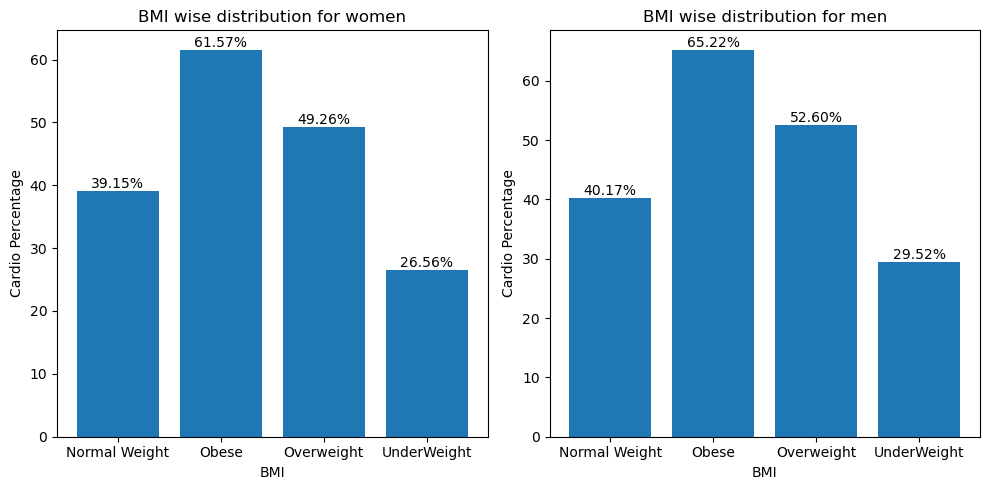

In [136]:
# Define the custom aggregate function with a lambda function
custom_agg_func = lambda x: len(x[x == 1])

# Calculate cardio percentages for women
df_ratings_women_counts = pd.pivot_table(df[df['gender'] == 1],
                                         index=['BMI class'],
                                         values=["cardio"],
                                         aggfunc=[custom_agg_func, len])
df_ratings_women_counts.columns = ['Custom Agg Func', 'Count']
df_ratings_women_counts['Cardio Percentage'] = (df_ratings_women_counts['Custom Agg Func'] / df_ratings_women_counts['Count']) * 100

# Calculate cardio percentages for men      
df_ratings_men_counts = pd.pivot_table(df[df['gender'] == 2],
                                       index=['BMI class'],
                                       values=["cardio"],
                                       aggfunc=[custom_agg_func, len])
df_ratings_men_counts.columns = ['Custom Agg Func', 'Count']
df_ratings_men_counts['Cardio Percentage'] = (df_ratings_men_counts['Custom Agg Func'] / df_ratings_men_counts['Count']) * 100

# Set up subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot bar graph for women
x_data_women = df_ratings_women_counts.index
y_data_women = df_ratings_women_counts['Cardio Percentage']
ax[0].bar(x_data_women, y_data_women)
ax[0].set_title('BMI wise distribution for women')
ax[0].set_xlabel('BMI')
ax[0].set_ylabel('Cardio Percentage')

# Add percentage labels above the bars for women
for i in range(len(x_data_women)):
    ax[0].text(x_data_women[i], y_data_women[i], f"{y_data_women[i]:.2f}%", ha='center', va='bottom')

# Plot bar graph for men
x_data_men = df_ratings_men_counts.index
y_data_men = df_ratings_men_counts['Cardio Percentage']
ax[1].bar(x_data_men, y_data_men)
ax[1].set_title('BMI wise distribution for men')
ax[1].set_xlabel('BMI')
ax[1].set_ylabel('Cardio Percentage')

# Add percentage labels above the bars for men
for i in range(len(x_data_men)):
    ax[1].text(x_data_men[i], y_data_men[i], f"{y_data_men[i]:.2f}%", ha='center', va='bottom')

# Adjust spacing between subplots
plt.tight_layout()

# Display the pivot tables
df_ratings_women_counts = df_ratings_women_counts.rename_axis("BMI wise distribution for Women")
display(df_ratings_women_counts)

df_ratings_men_counts = df_ratings_men_counts.rename_axis("BMI  wise distribution for Men")
display(df_ratings_men_counts)

# Show the plots
plt.show()

,Custom Agg Func,Count,Cardio Percentage
BMI class,,,
Normal Weight,2480,4306,57.594055
Obese,4776,6455,73.989156
Overweight,4088,6065,67.403133
UnderWeight,48,109,44.036697


,Custom Agg Func,Count,Cardio Percentage
BMI class,,,
Normal Weight,7166,20096,35.658838
Obese,6428,11465,56.066289
Overweight,8318,18477,45.018131
UnderWeight,129,534,24.157303


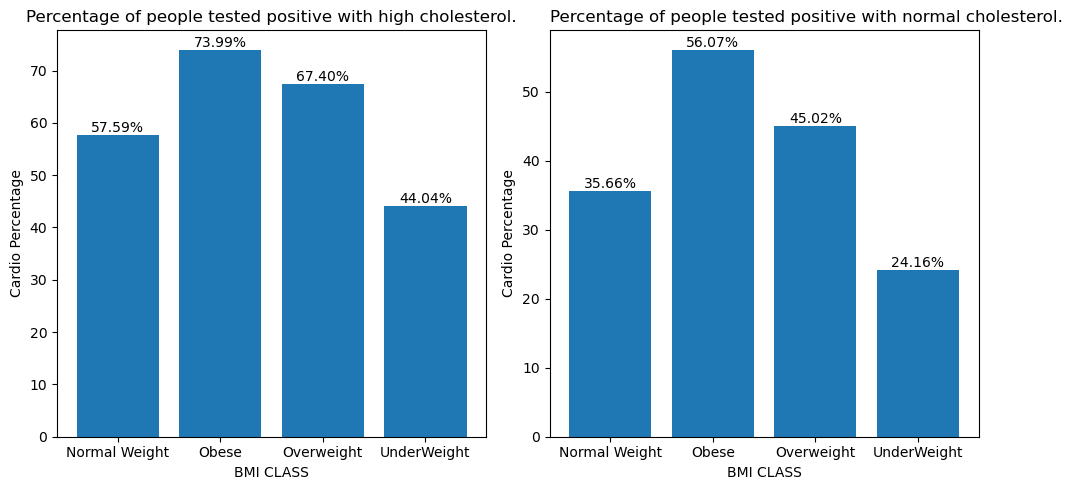

In [137]:
custom_agg_func = lambda x: len(x[x == 1])


df_chol = pd.pivot_table(df[((df['cholesterol']==2) | (df['cholesterol']==3))],
                                         index=['BMI class'],
                                         values=["cardio"],
                                         aggfunc=[custom_agg_func, len])
df_chol.columns = ['Custom Agg Func', 'Count']
df_chol['Cardio Percentage'] = (df_chol['Custom Agg Func'] / df_chol['Count']) * 100



df_cardio = pd.pivot_table(df[((df['cholesterol']==1))],
                                         index=['BMI class'],
                                         values=["cardio"],
                                         aggfunc=[custom_agg_func, len])
df_cardio.columns = ['Custom Agg Func', 'Count']
df_cardio['Cardio Percentage'] = (df_cardio['Custom Agg Func'] / df_cardio['Count']) * 100



fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))


x_data_chol = df_chol.index
y_data_chol = df_chol['Cardio Percentage']
ax[0].bar(x_data_chol, y_data_chol)
ax[0].set_title('Percentage of people tested positive with high cholesterol.')
ax[0].set_xlabel('BMI CLASS')
ax[0].set_ylabel('Cardio Percentage')


for i in range(len(x_data_chol)):
    ax[0].text(x_data_chol[i], y_data_chol[i], f"{y_data_chol[i]:.2f}%", ha='center', va='bottom')


x_data = df_cardio.index
y_data = df_cardio['Cardio Percentage']
ax[1].bar(x_data, y_data)
ax[1].set_title('Percentage of people tested positive with normal cholesterol.',x=0.6)
ax[1].set_xlabel('BMI CLASS')
ax[1].set_ylabel('Cardio Percentage')


for i in range(len(x_data_women)):
    ax[1].text(x_data[i], y_data[i], f"{y_data[i]:.2f}%", ha='center', va='bottom')
    



display(df_chol)
display(df_cardio)

plt.subplots_adjust(wspace=0.5)
# Adjust spacing between subplots
plt.tight_layout()




# Show the plots
plt.show()

,Custom Agg Func,Count,Cardio Percentage
BMI class,,,
Normal Weight,16,25,64.000000
Obese,68,98,69.387755
Overweight,44,69,63.768116


,Custom Agg Func,Count,Cardio Percentage
BMI class,,,
Normal Weight,5360,15426,34.746532
Obese,4741,8645,54.840949
Overweight,6221,14018,44.378656
UnderWeight,96,419,22.911695


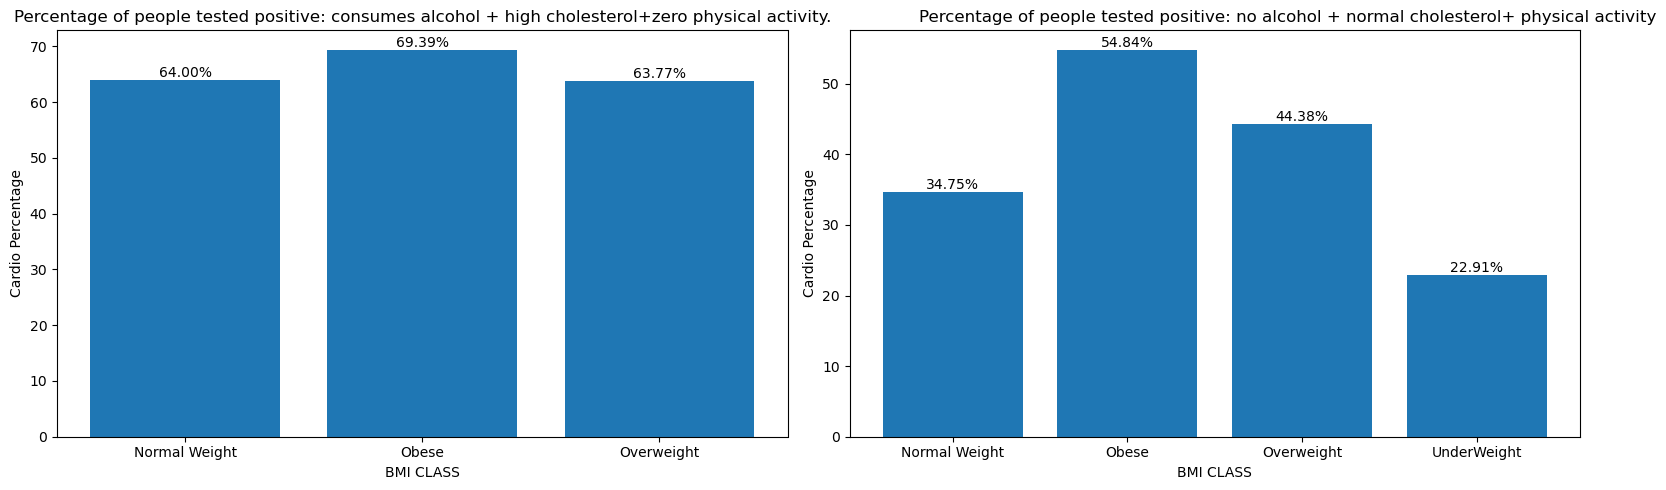

In [138]:
# Define the custom aggregate function with a lambda function
custom_agg_func = lambda x: len(x[x == 1])


df_cardio_smoke = pd.pivot_table(df[( (df['alco']==1) & (df['active']==0) &((df['cholesterol']==2) | (df['cholesterol'] ==3)))],
                                         index=['BMI class'],
                                         values=["cardio"],
                                         aggfunc=[custom_agg_func, len])
df_cardio_smoke.columns = ['Custom Agg Func', 'Count']
df_cardio_smoke['Cardio Percentage'] = (df_cardio_smoke['Custom Agg Func'] / df_cardio_smoke['Count']) * 100



df_cardio = pd.pivot_table(df[((df['alco']==0) & (df['active'] == 1) & (df['cholesterol']==1))],
                                         index=['BMI class'],
                                         values=["cardio"],
                                         aggfunc=[custom_agg_func, len])
df_cardio.columns = ['Custom Agg Func', 'Count']
df_cardio['Cardio Percentage'] = (df_cardio['Custom Agg Func'] / df_cardio['Count']) * 100



# Set up subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))


x_data_smoke = df_cardio_smoke.index
y_data_smoke = df_cardio_smoke['Cardio Percentage']
ax[0].bar(x_data_smoke, y_data_smoke)
ax[0].set_title('Percentage of people tested positive: consumes alcohol + high cholesterol+zero physical activity.')
ax[0].set_xlabel('BMI CLASS')
ax[0].set_ylabel('Cardio Percentage')


for i in range(len(x_data_smoke)):
    ax[0].text(x_data_smoke[i], y_data_smoke[i], f"{y_data_smoke[i]:.2f}%", ha='center', va='bottom')


x_data = df_cardio.index
y_data = df_cardio['Cardio Percentage']
ax[1].bar(x_data, y_data)
ax[1].set_title('Percentage of people tested positive: no alcohol + normal cholesterol+ physical activity',x=0.6)
ax[1].set_xlabel('BMI CLASS')
ax[1].set_ylabel('Cardio Percentage')


for i in range(len(x_data_women)):
    ax[1].text(x_data[i], y_data[i], f"{y_data[i]:.2f}%", ha='center', va='bottom')
    



display(df_cardio_smoke)
display(df_cardio)

# Adjust spacing between subplots
plt.tight_layout()




# Show the plots
plt.show()

,Custom Agg Func,Count,Cardio Percentage
BMI class,,,
Normal Weight,2882,5284,54.542014
Obese,5533,7739,71.495025
Overweight,4740,7380,64.227642
UnderWeight,55,136,40.441176


,Custom Agg Func,Count,Cardio Percentage
BMI class,,,
Normal Weight,6947,19562,35.512729
Obese,5904,10628,55.551374
Overweight,7909,17704,44.673520
UnderWeight,122,511,23.874755


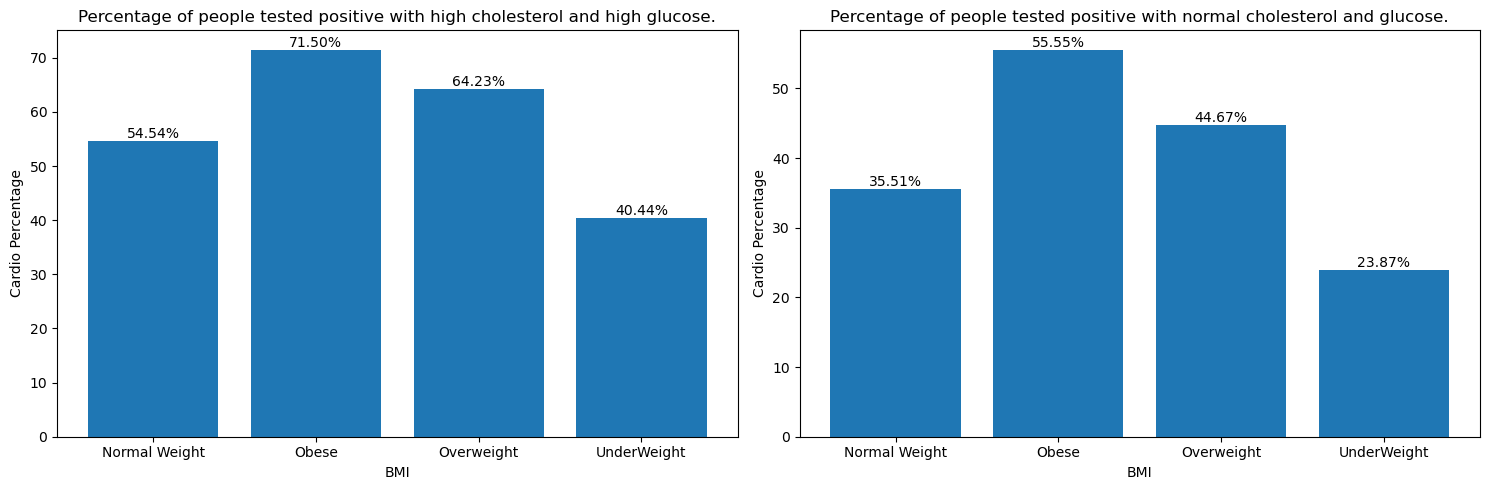

In [139]:
# Define the custom aggregate function with a lambda function
custom_agg_func = lambda x: len(x[x == 1])


df_chol = pd.pivot_table(df[((df['cholesterol']==2) | (df['cholesterol']==3) |(df['gluc']==2) |(df['gluc'] == 3))],
                                         index=['BMI class'],
                                         values=["cardio"],
                                         aggfunc=[custom_agg_func, len])
df_chol.columns = ['Custom Agg Func', 'Count']
df_chol['Cardio Percentage'] = (df_chol['Custom Agg Func'] / df_chol['Count']) * 100



df_cardio = pd.pivot_table(df[((df['cholesterol']==1) & df['gluc']==1)],
                                         index=['BMI class'],
                                         values=["cardio"],
                                         aggfunc=[custom_agg_func, len])
df_cardio.columns = ['Custom Agg Func', 'Count']
df_cardio['Cardio Percentage'] = (df_cardio['Custom Agg Func'] / df_cardio['Count']) * 100




fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))


x_data_chol = df_chol.index
y_data_chol = df_chol['Cardio Percentage']
ax[0].bar(x_data_chol, y_data_chol)
ax[0].set_title('Percentage of people tested positive with high cholesterol and high glucose.')
ax[0].set_xlabel('BMI')
ax[0].set_ylabel('Cardio Percentage')


for i in range(len(x_data_chol)):
    ax[0].text(x_data_chol[i], y_data_chol[i], f"{y_data_chol[i]:.2f}%", ha='center', va='bottom')


x_data = df_cardio.index
y_data = df_cardio['Cardio Percentage']
ax[1].bar(x_data, y_data)
ax[1].set_title('Percentage of people tested positive with normal cholesterol and glucose.')
ax[1].set_xlabel('BMI')
ax[1].set_ylabel('Cardio Percentage')


for i in range(len(x_data_women)):
    ax[1].text(x_data[i], y_data[i], f"{y_data[i]:.2f}%", ha='center', va='bottom')
    
 


display(df_chol)
display(df_cardio)

plt.subplots_adjust(wspace=0.5)
# Adjust spacing between subplots
plt.tight_layout()




# Show the plots
plt.show()


### Removing Outliers

In [140]:
def data_outliers(column_name, index):
    q1 = df[column_name].quantile(0.25)  
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (index * iqr)  
    upper_bound = q3 + (index * iqr)
    return df[~df[column_name].between(lower_bound, upper_bound, inclusive=True)]

In [141]:
data_outliers_height = data_outliers('height', 1.5)
data_outliers_weight = data_outliers('weight', 1.5)
data_outliers_ap_hi=data_outliers('ap_hi', 1.5)
data_outliers_ap_lo=data_outliers('ap_lo', 1.5)
data_outliers_BMI=data_outliers('bmi', 1.5)

/var/folders/l_/11jgdty55mn295ppc0b1v_p40000gn/T/ipykernel_11021/2547966872.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  return df[~df[column_name].between(lower_bound, upper_bound, inclusive=True)]


In [142]:
print(f'The number of rows with outliers is: {round((((len(data_outliers_weight))+ (len(data_outliers_height))+(len(data_outliers_ap_hi))+(len(data_outliers_ap_lo))+(len(data_outliers_BMI)))/len(df)*100), 2)}%')

The number of rows with outliers is: 12.61%


<Axes: title={'center': 'Distribution of parameters'}>

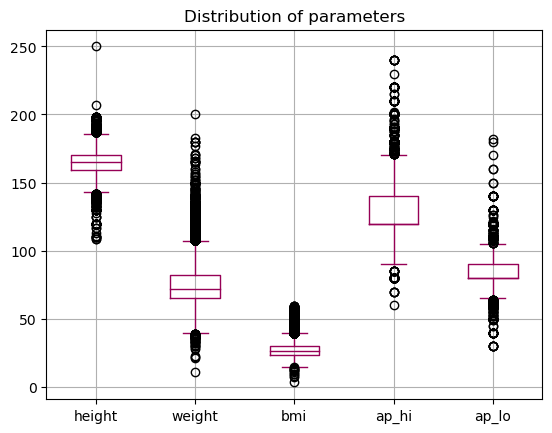

In [143]:
df[['height', 'weight',"bmi","ap_hi","ap_lo"]].plot(kind='box',
                              title='Distribution of parameters',grid=True, color='#960056')


In [144]:
df = df[~df.index.isin(data_outliers_weight.index)]
df = df[~df.index.isin(data_outliers_height.index)]
df = df[~df.index.isin(data_outliers_ap_hi.index)]
df = df[~df.index.isin(data_outliers_ap_lo.index)]
df = df[~df.index.isin(data_outliers_BMI.index)]
df


,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years,bmi,age_group,blood_pressure_level,BMI class
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,"[45,60]",Normal,Normal Weight
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,"[45,60]",Normal,Obese
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,"[45,60]",Normal,Normal Weight
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,"[45,60]",High,Overweight
5,1,151,67.0,120,80,2,2,0,0,0,0,60,29.384676,above 60,Normal,Overweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,1,172,70.0,130,90,1,1,0,0,1,1,53,23.661439,"[45,60]",Normal,Normal Weight
69994,1,165,80.0,150,80,1,1,0,0,1,1,57,29.384757,"[45,60]",Normal,Overweight
69995,2,168,76.0,120,80,1,1,1,0,1,0,52,26.927438,"[45,60]",Normal,Overweight
69998,1,163,72.0,135,80,1,2,0,0,0,1,61,27.099251,above 60,Normal,Overweight


<Axes: title={'center': 'Distribution of parameters'}>

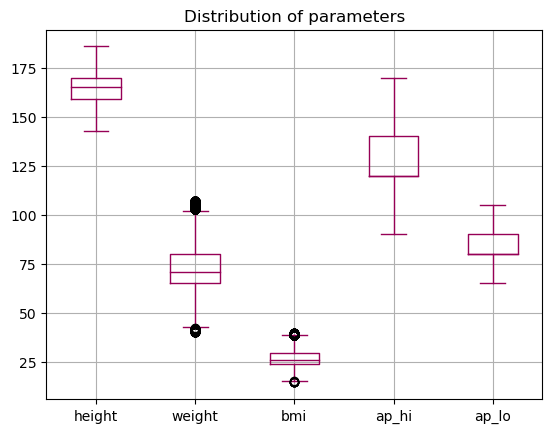

In [145]:
df[['height', 'weight',"bmi","ap_hi","ap_lo"]].plot(kind='box',
                              title='Distribution of parameters', grid=True, color='#960056')

In [146]:
data_outliers_weight = data_outliers('weight', 1.5)
df = df[~df.index.isin(data_outliers_weight.index)]
data_outliers_BMI=data_outliers('bmi', 1.5)
df = df[~df.index.isin(data_outliers_BMI.index)]
df

/var/folders/l_/11jgdty55mn295ppc0b1v_p40000gn/T/ipykernel_11021/2547966872.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  return df[~df[column_name].between(lower_bound, upper_bound, inclusive=True)]


,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years,bmi,age_group,blood_pressure_level,BMI class
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,"[45,60]",Normal,Normal Weight
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,"[45,60]",Normal,Obese
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,"[45,60]",Normal,Normal Weight
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,"[45,60]",High,Overweight
5,1,151,67.0,120,80,2,2,0,0,0,0,60,29.384676,above 60,Normal,Overweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,1,172,70.0,130,90,1,1,0,0,1,1,53,23.661439,"[45,60]",Normal,Normal Weight
69994,1,165,80.0,150,80,1,1,0,0,1,1,57,29.384757,"[45,60]",Normal,Overweight
69995,2,168,76.0,120,80,1,1,1,0,1,0,52,26.927438,"[45,60]",Normal,Overweight
69998,1,163,72.0,135,80,1,2,0,0,0,1,61,27.099251,above 60,Normal,Overweight


<Axes: title={'center': 'Distribution of BMI and '}>

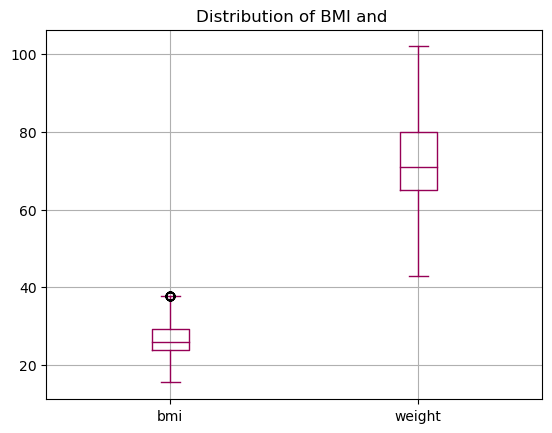

In [147]:
df[["bmi","weight"]].plot(kind='box',
                              title='Distribution of BMI and ', grid=True, color='#960056')

In [148]:
df.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years,bmi
count,60320.000000,60320.000000,60320.000000,60320.000000,60320.000000,60320.000000,60320.000000,60320.000000,60320.000000,60320.000000,60320.000000,60320.000000,60320.000000
mean,1.353349,164.545690,72.319904,126.163180,81.579841,1.348906,1.216479,0.087086,0.052089,0.805388,0.487666,52.872762,26.736274
std,0.478014,7.425951,11.329953,14.177979,7.625123,0.668163,0.563676,0.281963,0.222208,0.395905,0.499852,6.746180,4.047021
min,1.000000,143.000000,43.000000,90.000000,65.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000,15.495868
25%,1.000000,160.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.808690
50%,1.000000,165.000000,71.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000,26.037494
75%,2.000000,170.000000,80.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,29.384757
max,2.000000,186.000000,102.000000,170.000000,105.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000,37.807183


In [149]:
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years,bmi,age_group,blood_pressure_level,BMI class
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,"[45,60]",Normal,Normal Weight
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,"[45,60]",Normal,Obese
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,"[45,60]",Normal,Normal Weight
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,"[45,60]",High,Overweight
5,1,151,67.0,120,80,2,2,0,0,0,0,60,29.384676,above 60,Normal,Overweight


## Predicting and Modelling 

### Logistic Regression

Logistic regression is a statistical modeling technique used to predict the probability of a binary or categorical outcome based on one or more independent variables. It is a widely used method for classification tasks where the dependent variable is categorical, such as predicting whether an email is spam or not, whether a customer will churn or not, or whether a patient has a certain disease or not.

The theory behind logistic regression is based on the concept of the logistic function, also known as the sigmoid function. The sigmoid function maps any real-valued number to a value between 0 and 1, which can be interpreted as a probability

In [187]:
X = df[['gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active','age_in_years']]
y = df['cardio']

In [188]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression





In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101,shuffle=True)

In [190]:
sc= StandardScaler() 

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [191]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
X_train = pca.fit_transform(X_train)
X_test=pca.transform(X_test)
explained_variance_ratio = pca.explained_variance_ratio_

explained_variance = pca.explained_variance_ratio_

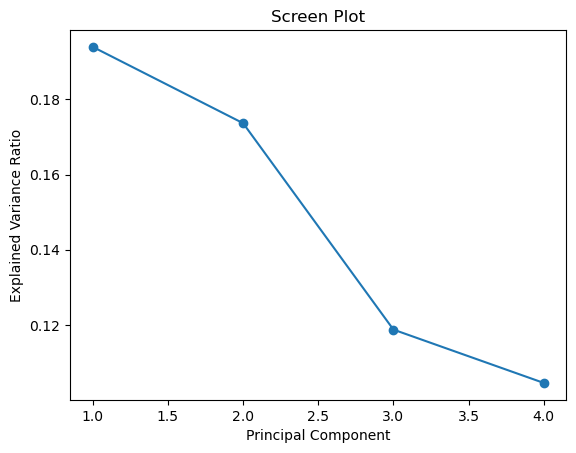

In [192]:
plt.plot(range(1, 4+1), explained_variance_ratio, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Screen Plot')
plt.show()








In [193]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)  

LogisticRegression()

In [194]:
predictions=logmodel.predict(X_test)

### Result 

In [195]:
from sklearn.metrics import classification_report,accuracy_score

A classification report is a useful tool for evaluating the performance of a classification model. It provides a comprehensive summary of various evaluation metrics for each class in a classification problem. The key metrics typically included in a classification report are precision, recall, F1-score, and support.

* Precision: Precision measures the accuracy of positive predictions made by the model. It is calculated as the ratio of true positives (TP) to the sum of true positives and false positives (FP). Precision indicates how well the model correctly identifies positive instances, with a higher value indicating fewer false positives.

* Recall: Recall, also known as sensitivity or true positive rate, measures the ability of the model to identify all positive instances correctly. It is calculated as the ratio of true positives to the sum of true positives and false negatives (FN). Recall represents the proportion of actual positive instances that the model captures.

* F1-score: The F1-score is the harmonic mean of precision and recall. It provides a balanced measure of the model's performance by considering both precision and recall. The F1-score combines these metrics into a single value, with higher scores indicating better performance. F1-score is particularly useful when the data is imbalanced, i.e., when the number of instances in different classes varies significantly.

* Support: Support represents the number of instances in each class. It is the actual number of occurrences of each class in the dataset. Support is helpful in understanding the distribution of classes and identifying any class imbalance issues.

The classification report presents these metrics for each class in the classification problem. It provides a concise summary of the model's performance across different classes, enabling a detailed analysis of its strengths and weaknesses. By examining the precision, recall, F1-score, and support values for each class, you can gain insights into how well the model performs for different categories and identify potential areas for improvement.

In addition to these metrics, the classification report may also include the accuracy score, which represents the overall accuracy of the model in predicting the correct class labels.

Overall, a classification report is a valuable tool for assessing the performance of a classification model, providing a comprehensive evaluation of precision, recall, F1-score, and support for each class in the classification problem.








In [196]:
ac = accuracy_score( y_test,predictions)
ac

0.7179242439465487

In [197]:
print(classification_report(y_test,predictions))  

              precision    recall  f1-score   support

           0       0.69      0.80      0.74     10179
           1       0.75      0.63      0.69      9727

    accuracy                           0.72     19906
   macro avg       0.72      0.72      0.72     19906
weighted avg       0.72      0.72      0.72     19906



In [198]:
from sklearn.metrics import confusion_matrix
confusion_matrix= confusion_matrix(y_test,predictions)  


 The confusion matrix consists of the following elements:

* True Positive (TP): The number of instances that are correctly predicted as positive.

* True Negative (TN): The number of instances that are correctly predicted as negative.

* False Positive (FP): The number of instances that are incorrectly predicted as positive (Type I error).

* False Negative (FN): The number of instances that are incorrectly predicted as negative (Type II error).




In [199]:
confusion_matrix 

array([[8140, 2039],
       [3576, 6151]])

In [200]:
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years,bmi,age_group,blood_pressure_level,BMI class
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,"[45,60]",Normal,Normal Weight
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,"[45,60]",Normal,Obese
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,"[45,60]",Normal,Normal Weight
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,"[45,60]",High,Overweight
5,1,151,67.0,120,80,2,2,0,0,0,0,60,29.384676,above 60,Normal,Overweight


In [201]:
#Decision Tree
from sklearn.model_selection import train_test_split

In [202]:

X = df[['gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active','age_in_years']]
y = df['cardio']

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101,shuffle = True)

In [204]:
from sklearn.tree import DecisionTreeClassifier

In [205]:
dtree=DecisionTreeClassifier()

In [206]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [207]:
#Predictions and Evaluation

In [208]:
predictions = dtree.predict(X_test)

In [209]:
from sklearn.metrics import classification_report,confusion_matrix

In [210]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.63      0.65      0.64     10179
           1       0.62      0.61      0.61      9727

    accuracy                           0.63     19906
   macro avg       0.63      0.63      0.63     19906
weighted avg       0.63      0.63      0.63     19906



In [211]:
print(confusion_matrix(y_test,predictions))
                                                     

[[6585 3594]
 [3825 5902]]


In [212]:
#Applying Random Forests

In [213]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators = 2000)


rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=2000)

In [214]:

rfc_pred=rfc.predict(X_test)   

In [215]:
print(confusion_matrix(y_test,rfc_pred))     

[[7356 2823]
 [3039 6688]]


In [216]:
print(classification_report(y_test,rfc_pred))  

              precision    recall  f1-score   support

           0       0.71      0.72      0.72     10179
           1       0.70      0.69      0.70      9727

    accuracy                           0.71     19906
   macro avg       0.71      0.71      0.71     19906
weighted avg       0.71      0.71      0.71     19906



In [1]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(X_train, y_train)  

NameError: name 'X_train' is not defined

In [ ]:
NB_pred=NB.predict(X_test)

In [217]:
import pickle

pickle.dump(sc,open("scaler.pickle","wb"))
ssc= pickle.load(open("scaler.pickle","rb"))

pickle.dump(logmodel, open('logmodel.pkl', 'wb'))
model = pickle.load(open('logmodel.pkl', 'rb'))
print(logmodel)

LogisticRegression()
